## Overview

This project explores the classification of forest cover types using the Covertype dataset from the UCI Machine Learning Repository. With over 580,000 instances and 54 cartographic and environmental features, the goal is to build a predictive model that accurately identifies forest cover types based on terrain and soil characteristics.


**The pipeline includes:**
- Data cleaning and preprocessing (standardization, categorical handling)
- Multi-class classification using Random Forest and XGBoost
- Model evaluation with confusion matrices and classification reports
- Feature importance analysis to interpret model decisions

## Feature Landscape

**Environmental Attributes**
- Elevation, slope, aspect, hillshade metrics
- Soil type and wilderness area encoded as binary features

**Modeling Techniques**
- Tree-based classifiers for robust multi-class prediction
- Stratified train-test split to preserve class balance


**Interpretability**
- Confusion matrix heatmaps to visualize misclassifications
- Feature importance plots to uncover influential terrain factors

## What Does This Analysis Aim to Do?

- Build a scalable and interpretable classification pipeline
- Benchmark model performance across algorithms
- Translate geospatial data into actionable forest type predictions

In [1]:
import numpy as np
import pandas as pd

##  Data Preprocessing

In [2]:
## Loading the data
df = pd.read_csv(r"covtype.csv")
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.shape

(581012, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [6]:
## Featuring the numeric values
from sklearn.preprocessing import StandardScaler

num_cols = df.columns[:10]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,0,0,0,0,0,0,0,0,0,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,0,0,0,0,0,0,0,0,0,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,0,0,0,0,0,0,0,0,0,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,0,0,0,0,0,0,0,0,0,3


## Model Training & Evaluation

In [7]:
## Train Test Split
from sklearn.model_selection import train_test_split

x = df.drop('Cover_Type', axis = 1)
y = df['Cover_Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [8]:
## Random Forest VS XGBoost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')

rf.fit(x_train, y_train_encoded)
xgb.fit(x_train, y_train_encoded)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning: [20:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_encoded = le.transform(y_test)
for model in [rf, xgb]:
    y_pred = model.predict(x_test)
    print(classification_report(y_test_encoded, y_pred, zero_division = 0))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95 

## Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

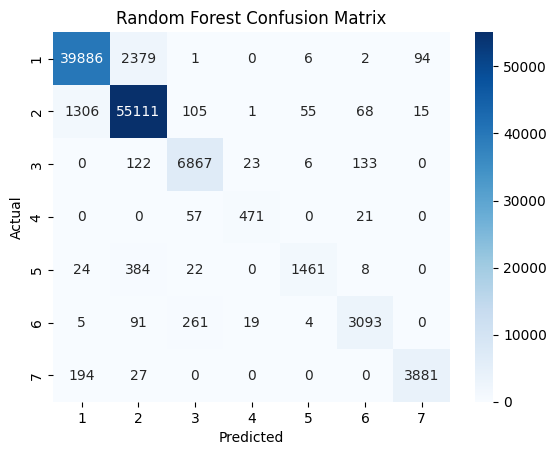

In [10]:
cm_rf = confusion_matrix(y_test_encoded, rf.predict(x_test))
labels = sorted(y_test.unique())
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

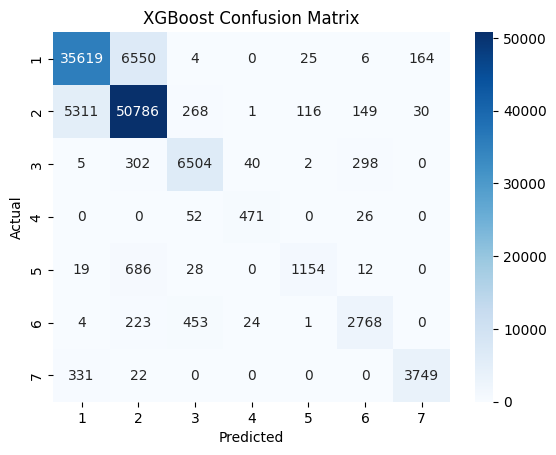

In [11]:
cm_xgb = confusion_matrix(y_test_encoded, xgb.predict(x_test))
labels = sorted(y_test.unique())
sns.heatmap(cm_xgb, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

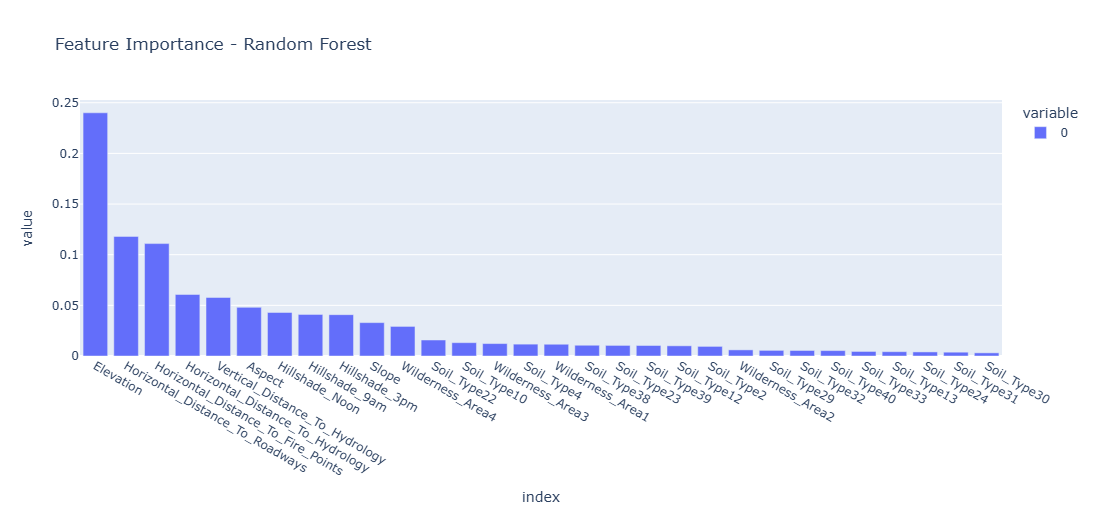

In [12]:
## Top 30 Feature Importance
importances = rf.feature_importances_
feat_names = x.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

fig = px.bar(feat_imp.head(30),
             title='Feature Importance - Random Forest',
             width=1100, height=500)

fig.show()